In [1]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import csv

In [2]:
pd.set_option('float_format', '{0:.2f}'.format)

In [3]:
zillow_df = pd.read_csv("OutputData - Total.csv")
zipcode_df = pd.read_csv("Files/manhattan_mod.csv")

In [4]:
zillow_df.head()

,Unnamed: 0,address,rent,sold,sold year,sqft,var,zipcode
0,0,189 E 7th St,nan,3300000.00,2015.00,4200.00,1,10009
1,1,189 E 7th St,14995.00,4844809.00,2018.00,2183.00,0,10009
2,2,189 E 7th St,14995.00,nan,nan,nan,2,10009
3,3,526 E 5th St,23000.00,6100000.00,2018.00,5200.00,0,10009
4,4,133 Avenue D APT 16,3995.00,nan,nan,nan,2,10009


In [5]:
zipcode_df.head()

,Neighborhood,zipcode
0,Central Harlem,10026
1,Central Harlem,10027
2,Central Harlem,10030
3,Central Harlem,10037
4,Central Harlem,10039


In [6]:
zillow_df = zillow_df.drop(columns='Unnamed: 0', axis=1) # axis 0 for row and axis 1 for column
zillow_df = pd.merge(zillow_df, zipcode_df, on="zipcode", how="outer")
# zillow_df = zillow_df[(zillow_df.loc[:,"sold"] > 100000) & (zillow_df.loc[:,"sold"] < 10000000)]
zillow_df = zillow_df[zillow_df.loc[:,"sold"] > 100000]
zillow_df.head()

,address,rent,sold,sold year,sqft,var,zipcode,Neighborhood
0,189 E 7th St,nan,3300000.00,2015.00,4200.00,1.00,10009,Lower Eastside
1,189 E 7th St,14995.00,4844809.00,2018.00,2183.00,0.00,10009,Lower Eastside
3,526 E 5th St,23000.00,6100000.00,2018.00,5200.00,0.00,10009,Lower Eastside
26,203 E 7th St,20000.00,6250000.00,2018.00,5446.00,0.00,10009,Lower Eastside
27,187 E 7th St,1600.00,425000.00,2008.00,2310.00,0.00,10009,Lower Eastside


In [7]:
zillow_df.count()

address         13083
rent            12943
sold            13083
sold year       13083
sqft            13083
var             13083
zipcode         13083
Neighborhood    13025
dtype: int64

In [8]:
rent_df = zillow_df.groupby("Neighborhood", as_index=False).median()
rent_df.columns

Index(['Neighborhood', 'rent', 'sold', 'sold year', 'sqft', 'var', 'zipcode'], dtype='object')

In [9]:
rent_df = rent_df.drop(columns=["sold","sold year","var", "sqft", "zipcode"], axis=1)
rent_df

,Neighborhood,rent
0,Central Harlem,3450.00
1,Chelsea/Clinton,5000.00
2,East Harlem,3200.00
3,Gramercy/Murray,3850.00
4,Greenwich/Soho,8000.00
5,Inwood/Washington Heights,2400.00
6,Lower Eastside,4296.50
7,Lower Manhattan,4709.00
8,Upper Eastside,4400.00
9,Upper Westside,4500.00


In [10]:
# 2 df will be created to plot the following:
# 1. data between 2015-2017
# 2. data for 2018
one_df = zillow_df[(zillow_df.loc[:,"sold year"] >2014) & (zillow_df.loc[:,"sold year"] <2018)] 
two_df = zillow_df[zillow_df.loc[:,"sold year"] == 2018]

In [11]:
# one_df = one_df.dropna(how="any")
# two_df = two_df.dropna(how="any")

In [12]:
one_df.count()

address         2228
rent            2164
sold            2228
sold year       2228
sqft            2228
var             2228
zipcode         2228
Neighborhood    2204
dtype: int64

In [13]:
two_df.count()

address         3235
rent            3234
sold            3235
sold year       3235
sqft            3235
var             3235
zipcode         3235
Neighborhood    3223
dtype: int64

In [14]:
one_df = one_df.groupby("Neighborhood", as_index=False).median()
two_df = two_df.groupby("Neighborhood", as_index=False).median()

In [15]:
one_df = one_df[["Neighborhood","sold", "sqft"]]
two_df = two_df[["Neighborhood","sold", "sqft"]]

In [16]:
one_df["Avg 20% Downpayment"] = one_df["sold"]*.2
two_df["Avg 20% Downpayment"] = two_df["sold"]*.2
# https://www.zillow.com/mortgage-learning/closing-costs/
one_df["Avg High Closing Cost"] = one_df["sold"]*.05
two_df["Avg High Closing Cost"] = two_df["sold"]*.05
# https://smartasset.com/taxes/new-york-property-tax-calculator#tanPCMyUa0
one_df["Avg Property Taxes"] = one_df["sold"]*.008
two_df["Avg Property Taxes"] = two_df["sold"]*.008
# https://www.insurance.com/new-york-homeowners-insurance
avg_property_insurance = 1595
avg_maintenance = 1500

year15 = 15 *12
year30 = 30 *12
year15_rate = 3.95/100/12
year30_rate = 4.5/100/12

one_df["15 Years Monthly Mortgage"] = (one_df["sold"] * .8) * (year15_rate * (1 +year15_rate) 
                                                                 ** year15) / ((1+year15_rate) ** year15 - 1)
one_df["30 Years Monthly Mortgage"] = (one_df["sold"] * .8) * (year30_rate * (1 +year30_rate) 
                                                                 ** year30) / ((1+year30_rate) ** year30 - 1)
two_df["15 Years Monthly Mortgage"] = (two_df["sold"] * .8) * (year15_rate * (1 +year15_rate) 
                                                                 ** year15) / ((1+year15_rate) ** year15 - 1)
two_df["30 Years Monthly Mortgage"] = (two_df["sold"] * .8) * (year30_rate * (1 +year30_rate) 
                                                                 ** year30) / ((1+year30_rate) ** year30 - 1)


In [17]:
one_df = pd.merge(one_df, rent_df, on="Neighborhood", how="outer")
two_df = pd.merge(two_df, rent_df, on="Neighborhood", how="outer")

In [18]:
one_net_operating_income = (one_df["rent"]*12) - (one_df["Avg Property Taxes"] + (avg_maintenance*12))
one_purchase_price = one_df["sold"] + one_df["Avg High Closing Cost"]                          
one_df["Annual Cap Rate"] = (one_net_operating_income/one_purchase_price) * 100

one_annual_cash_flow = (one_df["rent"]-one_df["30 Years Monthly Mortgage"])*12
one_total_invested = one_df["Avg 20% Downpayment"]+one_df["Avg High Closing Cost"]

one_df["Cash on Cash Return"] = (one_annual_cash_flow/one_total_invested) * 100


In [19]:
one_df

,Neighborhood,sold,sqft,Avg 20% Downpayment,Avg High Closing Cost,Avg Property Taxes,15 Years Monthly Mortgage,30 Years Monthly Mortgage,rent,Annual Cap Rate,Cash on Cash Return
0,Central Harlem,920000.00,966.00,184000.00,46000.00,7360.00,5425.68,3729.20,3450.00,1.66,-1.46
1,Chelsea/Clinton,1625000.00,1070.00,325000.00,81250.00,13000.00,9583.40,6586.91,5000.00,1.70,-4.69
2,East Harlem,590000.00,755.00,118000.00,29500.00,4720.00,3479.51,2391.55,3200.00,2.53,6.58
3,Gramercy/Murray,1250000.00,880.00,250000.00,62500.00,10000.00,7371.85,5066.85,3850.00,1.39,-4.67
4,Greenwich/Soho,2750000.00,1416.00,550000.00,137500.00,22000.00,16218.07,11147.08,8000.00,1.94,-5.49
5,Inwood/Washington Heights,481650.00,800.00,96330.00,24082.50,3853.20,2840.52,1952.36,2400.00,1.37,4.46
6,Lower Eastside,1590000.00,985.00,318000.00,79500.00,12720.00,9376.99,6445.04,4296.50,1.25,-6.49
7,Lower Manhattan,1225000.00,1083.00,245000.00,61250.00,9800.00,7224.41,4965.52,4709.00,2.23,-1.01
8,Upper Eastside,1490000.00,950.00,298000.00,74500.00,11920.00,8787.24,6039.69,4400.00,1.46,-5.28
9,Upper Westside,1301680.00,974.00,260336.00,65084.00,10413.44,7676.63,5276.34,4500.00,1.87,-2.86


In [20]:
two_net_operating_income = (two_df["rent"]*12) - (two_df["Avg Property Taxes"] + (avg_maintenance*12))
two_purchase_price = two_df["sold"] + two_df["Avg High Closing Cost"]                          
two_df["Annual Cap Rate"] = (two_net_operating_income/two_purchase_price) * 100

two_annual_cash_flow = (two_df["rent"]-two_df["30 Years Monthly Mortgage"])*12
two_total_invested = two_df["Avg 20% Downpayment"]+two_df["Avg High Closing Cost"]

two_df["Cash on Cash Return"] = (two_annual_cash_flow/two_total_invested) * 100

In [21]:
two_df

,Neighborhood,sold,sqft,Avg 20% Downpayment,Avg High Closing Cost,Avg Property Taxes,15 Years Monthly Mortgage,30 Years Monthly Mortgage,rent,Annual Cap Rate,Cash on Cash Return
0,Central Harlem,981250.00,1253.50,196250.00,49062.50,7850.00,5786.90,3977.48,3450.00,1.51,-2.58
1,Chelsea/Clinton,1100000.00,1046.00,220000.00,55000.00,8800.00,6487.23,4458.83,5000.00,2.87,2.36
2,East Harlem,719000.00,1600.00,143800.00,35950.00,5752.00,4240.29,2914.45,3200.00,1.94,1.91
3,Gramercy/Murray,819000.00,900.00,163800.00,40950.00,6552.00,4830.03,3319.80,3850.00,2.52,3.11
4,Greenwich/Soho,2750000.00,1800.00,550000.00,137500.00,22000.00,16218.07,11147.08,8000.00,1.94,-5.49
5,Inwood/Washington Heights,587250.00,1000.00,117450.00,29362.50,4698.00,3463.29,2380.41,2400.00,0.99,0.16
6,Lower Eastside,984000.00,875.00,196800.00,49200.00,7872.00,5803.12,3988.63,4296.50,2.49,1.50
7,Lower Manhattan,1537500.00,1474.50,307500.00,76875.00,12300.00,9067.37,6232.23,4709.00,1.62,-4.76
8,Upper Eastside,975000.00,1150.00,195000.00,48750.00,7800.00,5750.04,3952.15,4400.00,2.64,2.20
9,Upper Westside,1050000.00,1127.00,210000.00,52500.00,8400.00,6192.35,4256.16,4500.00,2.50,1.11


C:\Users\yuj\anaconda\anaconda3\envs\PythonData\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


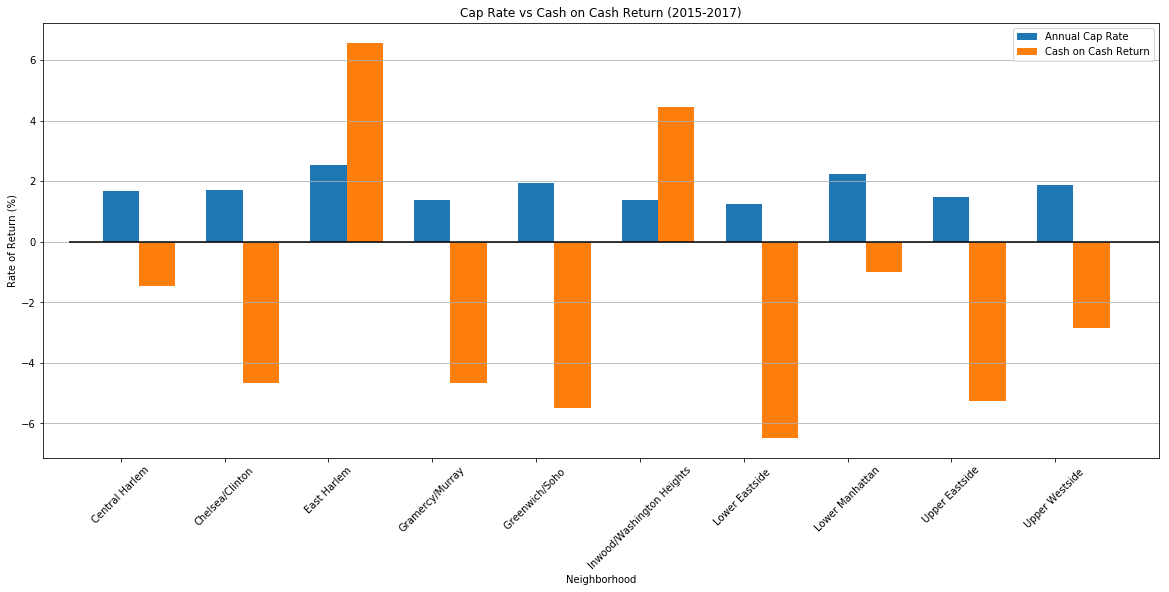

In [22]:
x_axis = np.arange(len(one_df['Neighborhood']))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,8))

bar_width = 0.35

plt.bar(x_axis, one_df['Annual Cap Rate'], bar_width, label="Annual Cap Rate")

plt.bar(x_axis+bar_width, one_df['Cash on Cash Return'], bar_width, label="Cash on Cash Return")

plt.xticks(tick_locations, one_df['Neighborhood'], rotation="45")
plt.xlim(-0.75, len(x_axis))

plt.hlines(y = 0, xmin = -0.5, xmax = 10)
ax = plt.axes()
ax.yaxis.grid(True)

plt.title("Cap Rate vs Cash on Cash Return (2015-2017)")
plt.xlabel("Neighborhood")
plt.ylabel(f"Rate of Return (%)")

plt.legend()

plt.savefig('CapRate_CoCReturn_2015_2017.png')
plt.show()

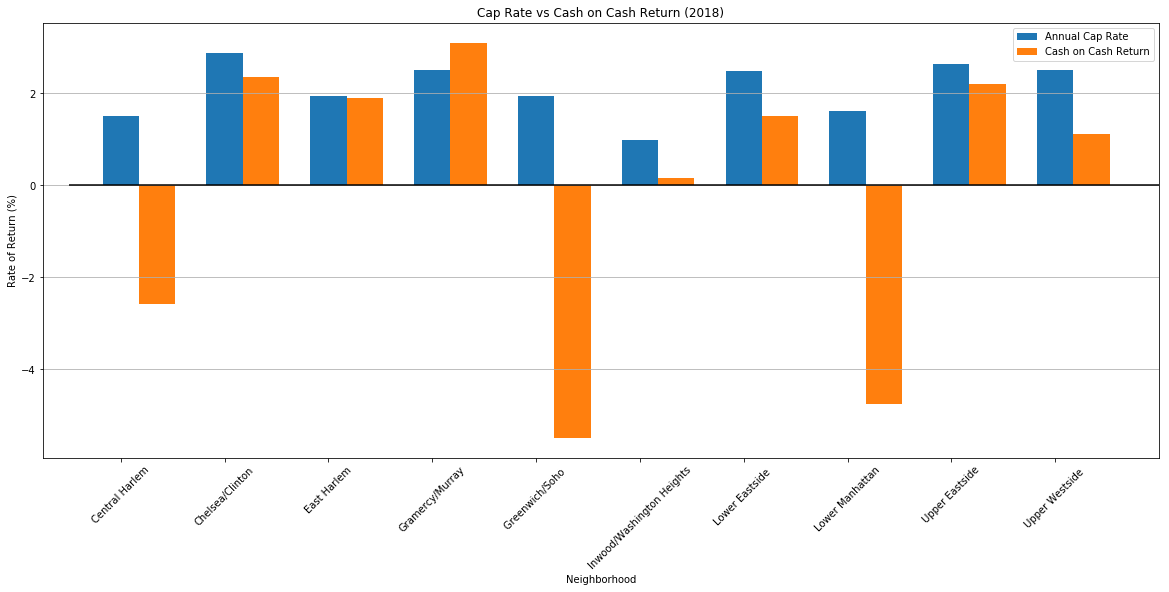

In [23]:
x_axis = np.arange(len(two_df['Neighborhood']))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,8))

bar_width = 0.35

plt.bar(x_axis, two_df['Annual Cap Rate'], bar_width, label="Annual Cap Rate")

plt.bar(x_axis+bar_width, two_df['Cash on Cash Return'], bar_width, label="Cash on Cash Return")

plt.xticks(tick_locations, two_df['Neighborhood'], rotation="45")
plt.xlim(-0.75, len(x_axis))

plt.hlines(y = 0, xmin = -0.5, xmax = 10)
ax = plt.axes()
ax.yaxis.grid(True)

plt.title("Cap Rate vs Cash on Cash Return (2018)")
plt.xlabel("Neighborhood")
plt.ylabel(f"Rate of Return (%)")

plt.legend()

plt.savefig('CapRate_CoCReturn_2018.png')
plt.show()

In [24]:
one_df.to_csv("2015_2017_Returns.csv")
two_df.to_csv("2018_Returns.csv")

In [ ]:
# x_axis = np.arange(len(clean_df['Neighborhood']))
# tick_locations = [value for value in x_axis]
# plt.figure(figsize=(20,5))

# bar_width = 0.25

# plt.bar(x_axis, clean_df['rent'], bar_width, color="black", label="Rent")
# plt.bar(x_axis+bar_width, clean_df['15 Years Monthly Mortgage'], bar_width, color="blue", label="15 Years Monthly Mortgage")
# plt.bar(x_axis+bar_width, clean_df['Avg 20% Downpayment']/year1, bar_width, color="brown",
#         bottom=clean_df['15 Years Monthly Mortgage'], label="Avg 20% Downpayment over 15 Years")
# plt.bar(x_axis+bar_width, clean_df['Avg Property Taxes'], bar_width, color="green",
#         bottom=clean_df['Avg 20% Downpayment']/year1+clean_df['15 Years Monthly Mortgage'], label="Avg Property Taxes")

# plt.bar(x_axis+bar_width*2, clean_df['30 Years Monthly Mortgage'], bar_width, color="red", label="30 Years Monthly Mortgage")
# plt.bar(x_axis+bar_width*2, clean_df['Avg 20% Downpayment']/year2, bar_width, color="brown",
#         bottom=clean_df['30 Years Monthly Mortgage'], label="Avg 20% Downpayment over 30 Years")
# plt.bar(x_axis+bar_width*2, clean_df['Avg Property Taxes'], bar_width, color="green",
#         bottom=clean_df['Avg 20% Downpayment']/year2+clean_df['30 Years Monthly Mortgage'])

# plt.xticks(tick_locations, clean_df['Neighborhood'], rotation="vertical")
# plt.xlim(-0.75, len(x_axis))

# plt.title("Rent vs Purchase")
# plt.xlabel("Neighborhood")
# plt.ylabel(f"Average Monthly cost ($)")

# plt.legend()

# plt.show()